In [153]:
"""
Stirling engine ODE solver
By Shane Gervais
2022/03/27

This classes purpose is to solve ODE's in our Striling Engine System 
and plot the Stirling Cycle PV diagram
"""

"\nStirling engine ODE solver\nBy Shane Gervais\n2022/03/27\n\nThis classes purpose is to solve ODE's in our Striling Engine System \nand plot the Stirling Cycle PV diagram\n"

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [155]:
def dSdt(o, S):
    o, w = S
    return [w, -FA*R*np.cos(o) - b*w]


b = 0.7E-3 #N/s damping constant
Vc = 40 #Volume in displacment cylindar
A0 = 40 #surface area of piston in cm^2
#Initial conditions
o0 = 0
w0 = 0
S0 = (o0, w0)
R = 1.25 #cm Radius of piston
Ap = 1.9 #cm^2 surface area of piston
Vc = 40 #cm^3 Compressed volume
theta0 = 0 #angle at which we have max amplitude
L = 20 #cm Stroke length of the piston
rodLength = 30 #cm Rod length
Th = 600 #K Max temperature
Tl = 300 #K Min Temperature
kB = 1.38064852E-23 #m^2kgs^-2K^-1 Boltzman constant
N = 6.02214E23 #number of particles
Na = 6.02214E2 #mol^-1 Avegadro's number
Rconstant = kB*Na
n = N/Na #Number of moles
PA = N*kB*Th/Vc
FA = PA*Ap
cV = 717 #/kg/K heat capacity of gas

In [156]:
t = np.linspace(0, 1, 100)
sol = odeint(dSdt, y0 = S0, t=t, tfirst = True)

In [157]:
osol = sol.T[0]
wsol = sol.T[1]

Text(0, 0.5, 'Theta')

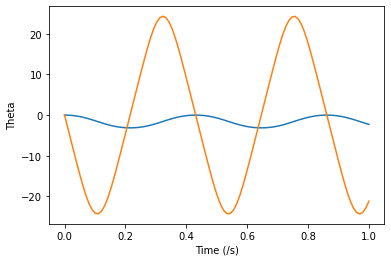

In [158]:
plt.plot(t, osol)
plt.plot(t, wsol)
plt.xlabel('Time (/s)')
plt.ylabel('Theta')

In [159]:
Xt = R*(1+np.cos(osol))
Vt = (Vc + Ap*Xt)
Tt = Th + Tl*np.sin(osol)

Text(0, 0.5, 'Position (/cm)')

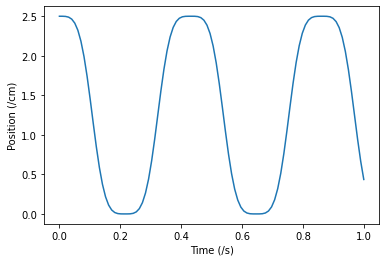

In [160]:
plt.plot(t, Xt)
plt.xlabel('Time (/s)')
plt.ylabel('Position (/cm)')

Text(0, 0.5, 'Temperature (/K)')

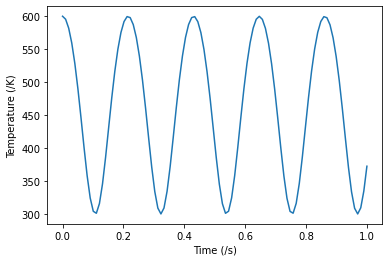

In [161]:
plt.plot(t, Tt)
plt.xlabel('Time (/s)')
plt.ylabel('Temperature (/K)')

In [162]:
x0 = R*(1 + np.cos(theta0)) #Maximum amplitude of x
Vd = Vc + Ap*x0 #Displacement volume
Pa = (n*Rconstant*Th)/Vc

In [163]:
def pistonMotion(L, rodLength, Vc, Vd, startAngle, endAngle):

    pinRadius = L/2
    ratio = rodLength/pinRadius

    compressionRatio = Vd/Vc

    theta = np.linspace(startAngle, endAngle, 180)

    A = (1/2)*(compressionRatio - 1)
    B = ratio + 1 - np.cos(theta)
    C = (ratio**2 - np.sin(theta)**2)**(1/2)

    V = (1 + A*(B - C))*Vc
    return V

In [164]:
#At point A
Vexp = pistonMotion(L, rodLength, Vc, Vd, 0, 180)
constant = Pa*Vc
Pexp = constant/Vexp

#Isothermal from A to B
#With PaVa = PbVb
Pb = Pa*(Vc/Vd)

#Isochoric from B to C#With Pb/Tb = Pc/Tc
Pc = Pb*(Tl/Th)
Vcomp = pistonMotion(L, rodLength, Vc, Vd, 180, 0)
constant = Pc*Vd
Pcomp = constant/Vcomp

#Isochoric from C to D
#With PcVc = PdVd
Pd = Pc*(Vd/Vc)

Text(0, 0.5, 'Pressure (/cPa)')

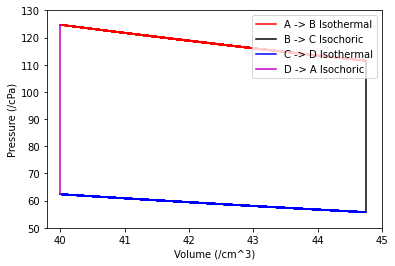

In [165]:
plt.plot(Vexp, Pexp, 'r')
plt.plot([Vd, Vd], [Pb, Pc], 'k')
plt.plot(Vcomp, Pcomp, 'b')
plt.plot([Vc, Vc], [Pd, Pa], 'm')
plt.legend(['A -> B Isothermal', 'B -> C Isochoric', 'C -> D Isothermal', 'D -> A Isochoric'], loc = 'upper right')
plt.axis([39.8, 45, 50, 130])
plt.xlabel('Volume (/cm^3)')
plt.ylabel('Pressure (/cPa)')